<a href="https://colab.research.google.com/github/gani88/ForecastingTimeSeries/blob/main/Forecasting_Time_Series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting

This is basically my learning progress on Forecasting using Time Series. This learning is based from kaggle (the code, project, dataset) and I want to summarize all my learning progress in this repo. So this is first part of Forecasting : Time Series Learning.





For this first part I will use several dataset from kaggle.

---


So what is the Time Series?
Basically Forecasting involves analyzing time series data, which consists of recorded observations over time. These observations are usually taken at regular intervals, such as daily or monthly, in various forecasting applications.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
import pandas as pd

df = pd.read_csv('/content/book_sales.csv', index_col='Date', parse_dates=['Date'])

df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [2]:
df.describe()

,Paperback,Hardcover
count,30.000000,30.000000
mean,186.400000,198.833333
std,35.480543,40.301522
min,111.000000,128.000000
25%,167.250000,170.500000
50%,189.000000,200.500000
75%,207.250000,222.000000
max,247.000000,283.000000



This set of data keeps track of how many hardcover books were sold in a store for 30 days (will drop the paperback column). As you can see, there's data showing the number of hardcover books sold, and the dates they were sold are noted too.

In [3]:
df = df.drop('Paperback', axis=1)

In [4]:
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


## Forecasting models use Linear Regression

Linear regression is a popular technique that can be applied effectively to various forecasting tasks, even when they're quite complex.

In linear regression, the algorithm learns how to calculate a total by taking a sum of the input features, each multiplied by a specific weight. If we have two features, the calculation would look like this:


---


target = weight_1 * feature_1 + weight_2 * feature_2 + bias



Here:



*  **target** = the value we're trying to predict or forecast.
*  **feature_1** and **feature_2** = input features that might help us predict the target.
*   **weight_1** and **weight_2** = the coefficients that determine the importance of each feature in making predictions.
*   **bias** = constant term that accounts for any offset in the prediction.


---


When the algorithm is being trained (meaning it's learning from data), it finds the best values for weight_1, weight_2, and bias that minimize the difference between the predicted values and the actual target values. This approach is often referred to as "ordinary least squares" because it aims to minimize the squared differences between predictions and actual outcomes.

The weights are essentially the coefficients that control how much each feature influences the prediction, and the bias is like a baseline adjustment to ensure the prediction lines up correctly with the data. The bias is also called the intercept, as it signifies where the line representing the model crosses the vertical axis on a graph.

In summary, linear regression is a method that uses input features and their associated weights along with a bias to make predictions. It's a powerful technique often used in forecasting because it can handle various types of forecasting tasks, even ones that are complex.

### Time Step Features
There are two kind of features : Time-Step and Lag Features.

First is Time-Step. Time-step features are essentially characteristics or attributes that we can create directly from the time index in a dataset.

A very basic example of a time-step feature is the time dummy. This involves counting the steps or intervals in a time series from the start to the end. It's like putting numbers on each time point to show how much time has passed.

This time dummy helps in understanding how the data changes over time and gives a clear sense of the sequence of events. Time-step features can provide additional context and patterns to the data that can be useful when building forecasting models or other analyses.

In [ ]:
import numpy as np

df['Time Dummy'] = np.arange(len(df.index))

df.head()

,Hardcover,Time Dummy
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


When linear regression is applied using the time dummy technique, the resulting model takes the form:

target = weight * time + bias

Here's what each term means:


* **target**  : This is the value you're trying to predict or understand, often referred to as the dependent variable.
* **weight**  : This represents the coefficient that signifies the strength of the relationship between the time and the target. It indicates how much the target value changes for each unit change in time.
* **time**    : This is the time dummy value we discussed earlier, representing the chronological sequence of observations, starting from 0 and incrementing with each time step.
* **bias**  : Also known as the intercept, this is a constant term that accounts for any baseline value in the target variable, even when time is 0.




So, the linear regression model uses the time dummy as an independent variable along with its associated weight and bias to predict or explain the target value.

Now, why is this useful? The **time dummy** allows us to create curves that fit the patterns in time series data when we plot the data over time. Imagine a graph with Time on the x-axis and target on the y-axis. By using the weight and bias determined by the linear regression, the model can generate a curve that closely aligns with the observed data points. This curve can help us visualize the overall trend, direction, and potential variations in the time series.

In summary, using linear regression with the time dummy allows us to create a simple model that captures how the target variable changes over time. The time dummy helps us create curves that closely match the patterns in the data when we plot the time series.

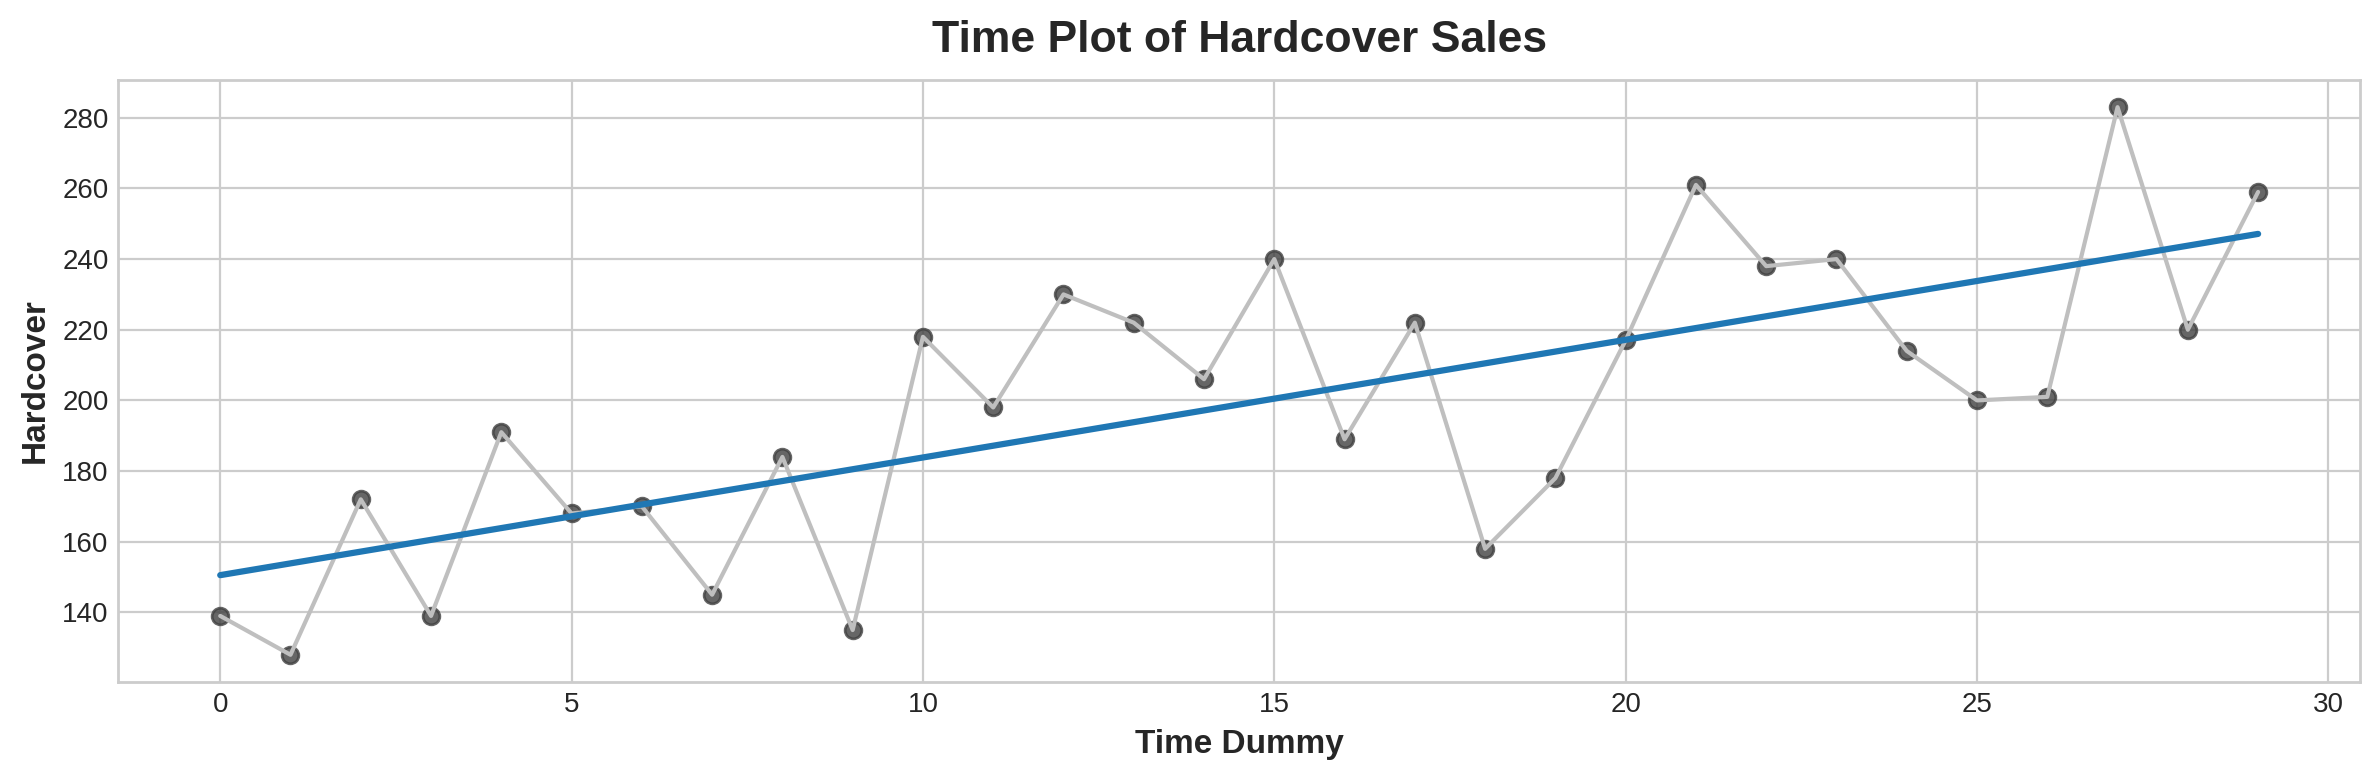

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc(
    "figure",
    autolayout=True,
    figsize=(12,4),
    titlesize=18,
    titleweight='bold'
)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10
)

fig, ax = plt.subplots()
ax.plot('Time Dummy', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time Dummy', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

Time-step features enable you to capture the relationship between data points based on their timing or sequence. A dataset is said to have time dependence if the values of the data can be anticipated or forecasted by considering the time at which they occurred.

For instance, let's consider the Hardcover Sales series. This refers to a set of data representing sales of hardcover books over a period of time, like a month. Now, if you find that you can predict how many hardcover books will be sold later in the month based on the time within the month, then the data has time dependence.

### Lag Features

Lag features are created by shifting the observations of a series, usually the target variable, so that they appear as if they happened at a later time. In simpler terms, you're "lagging" the data points by moving them forward in time. This technique is valuable in time series analysis and forecasting.

In summary, lag features allow you to capture past behavior and use it as a predictor for future behavior. They're created by shifting the values of a series forward in time, making them appear as if they occurred later. This technique is essential in time series analysis and forecasting as it helps incorporate historical trends into predictive models.

In [16]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head(10)

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0
2000-04-06,168,191.0
2000-04-07,170,168.0
2000-04-08,145,170.0
2000-04-09,184,145.0


Linear regression with a lag feature results in a model that can be represented as:


---


**target** = weight * lag + bias

Here's what each component means:


* **target**: This is the value you're trying to predict or understand, often referred to as the dependent variable.
* **lag**: This refers to the lagged feature, which is a value taken from a previous time step. In this context, it's the value of the target variable at a specific lagged time point.
* **weight**: This is the coefficient that signifies the strength of the relationship between the lag and the target. It indicates how much the target value changes for each unit change in the lagged value.
* **bias**: Also known as the intercept, this is a constant term that accounts for any baseline value in the target variable, even when the lag is 0.

---

In simpler terms, the linear regression model is learning how the target variable changes based on the lag feature.

Now, why is this significant? The lag feature enables us to create curves that fit the patterns in lag plots. A lag plot is a graphical representation where each observation in a series is plotted against the previous observation. This visual representation helps us understand the relationship between the current value and the previous value.

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

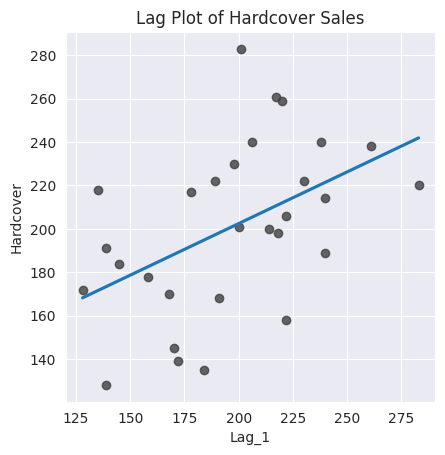

In [14]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

**Lag Plot and Correlation:**

In a lag plot, we can visually represent data points against their previous data points. In the context of sales data, if you plot the sales of one day against the sales of the previous day, you might notice a pattern. For instance, if higher sales on one day are associated with higher sales on the next day, there's a visible correlation. This means that the sales from one day seem to influence the sales from the next day.

**Serial Dependence and Time Series:**

More broadly, lag features allow you to capture what's known as serial dependence in time series data. This serial dependence indicates that the current observation can be predicted based on previous observations. In Hardcover sales example, when you have a strong correlation between sales on consecutive days, it implies that the sales pattern is somewhat consistent over time. This information is crucial for making accurate predictions.

## Another Example

This example will use another dataset from kaggle (also this example is from kaggle, I'm just reiterate again in here + add some explanation)


In [19]:
# Matplotlib default
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(12,5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)

<ipython-input-19-8c9325b75cbb>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [26]:
data_tunnel = "/content/tunnel.csv"
tunnel = pd.read_csv(data_tunnel, parse_dates=["Day"])
tunnel = tunnel.set_index("Day")

In [ ]:
tunnel.head()

In [28]:
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


### Time-step feature

In [29]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


Will fitting it for linear regression using scikit-learn

In [30]:
from sklearn.linear_model import LinearRegression

# Data training
X = df.loc[:, ['Time']] #features
y = df.loc[:, 'NumVehicles'] #target

# Training the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In summary, the code segment uses the Scikit-Learn library to perform linear regression. It trains a linear regression model using the 'Time' column as the feature and the 'NumVehicles' column as the target from the DataFrame df. The trained model is then used to make predictions on the same feature data, and the predicted values are stored in the y_pred Series, maintaining the original time index.

In [35]:
result_df = pd.DataFrame(index=X.index)
result_df['X'] = X['Time']
result_df['y'] = y
result_df['y_pred'] = y_pred

result_df.index = X.index

In [42]:
result_df.head(65)

,X,y,y_pred
Day,,,
2003-11-01,0,103536,98176.206344
2003-11-02,1,92051,98198.703794
2003-11-03,2,100795,98221.201243
2003-11-04,3,102352,98243.698693
2003-11-05,4,106569,98266.196142
...,...,...,...
2003-12-31,60,69097,99526.053316
2004-01-01,61,53098,99548.550766
2004-01-02,62,62895,99571.048215


Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

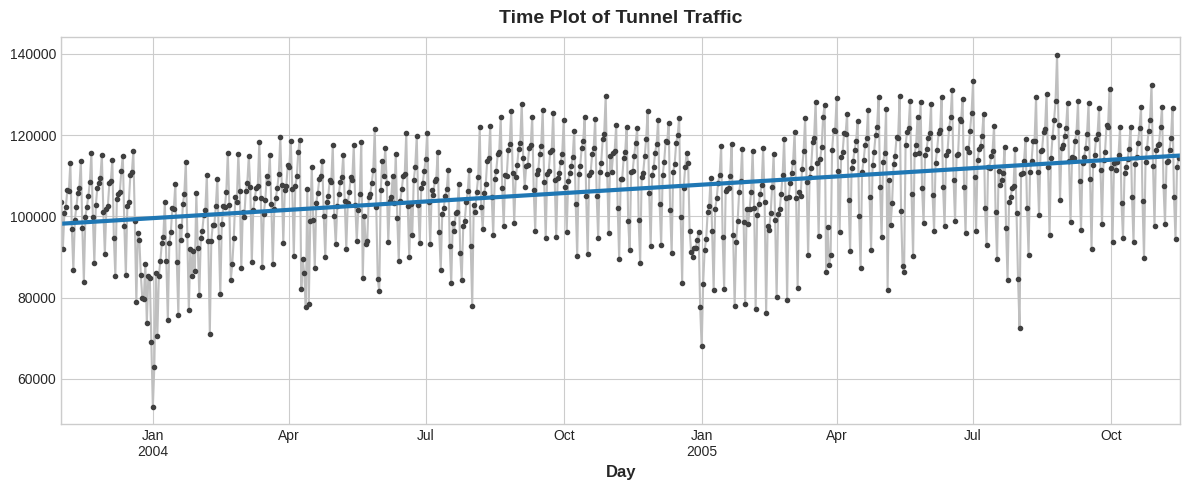

In [39]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')

### Lag Feature

In [43]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [44]:
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [47]:
result_lag = pd.DataFrame(index=X.index)
result_lag['X'] = X['Lag_1']
result_lag['y'] = y
result_lag['y_pred'] = y_pred

result_lag.index = X.index

In [48]:
result_lag.head()

,X,y,y_pred
Day,,,
2003-11-02,103536.0,92051,104961.799284
2003-11-03,92051.0,100795,98840.684037
2003-11-04,100795.0,102352,103500.939302
2003-11-05,102352.0,106569,104330.767464
2003-11-06,106569.0,106284,106578.285356


Now we will plot it to see relationship between number of vehicles one day and the previous day

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

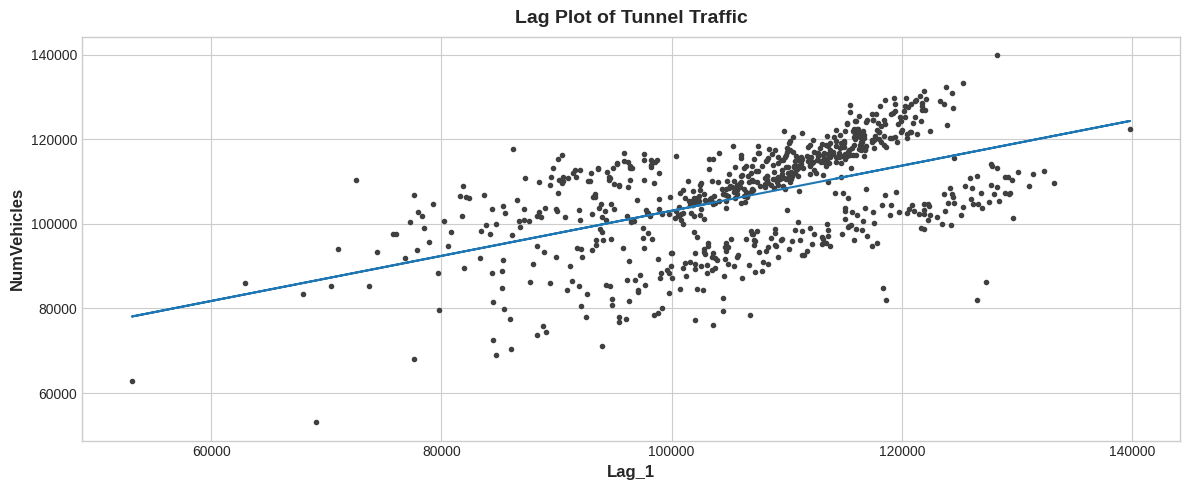

In [49]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

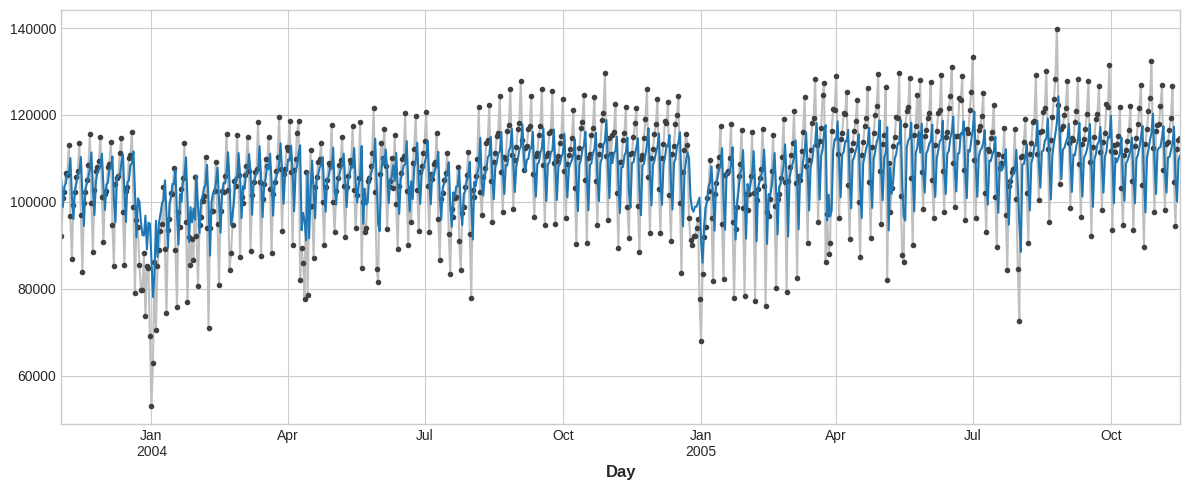

In [52]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax)